In [ ]:
# Gerekli kütüphaneleri yükleme
!pip install jsonlines
!apt-get update -qq
!apt-get install -y openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://github.com/ahmetaa/zemberek-nlp/releases/download/v0.17.1/zemberek-full.jar -O zemberek-full.jar
!pip install py4j
!pip install jpype1
!pip install zemberek-python


import jsonlines
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from zemberek import TurkishMorphology
from py4j.java_gateway import JavaGateway
import jpype
import jpype.imports
from jpype.types import JString
import jsonlines

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 MB 7.8 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141211 sha256=a5de07f0cd0ecf2a53d38f7eb06d96b732672fa324f2388ea87bc5f444ac93d9
  Stored in directory: /root/.cache/pip/wheels/21/10/be/9a70640a3a60ed4a7e1a45e49bb9f58b04692d5d7b517bd39e
Successfully built antlr4-python3-runtime


In [ ]:
from google.colab import drive

# Google Drive'ı bağla
drive.mount('/content/drive')


Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Device: cpu
Eğitim veri seti başarıyla yüklendi!
Test veri seti başarıyla yüklendi!
                                                text          label  \
0  @USER en güzel uyuyan insan ödülü jeon jungkoo...  not-offensive   
1  @USER Mekanı cennet olsun, saygılar sayın avuk...  not-offensive   
2  Kızlar aranızda kas yığını beylere düşenler ol...  not-offensive   
3  Biraz ders çalışayım. Tembellik ve uyku düşman...  not-offensive   
4  @USER Trezeguet yerine El Sharawy daha iyi olm...  not-offensive   

                                  Processed_Text  Offensive_Label  \
0  en güzel uyu insan ödül jeon jungkook gid ...                0   
1  mekan cennet saygı sayın avukat iyi günle dil                0   
2    kız ara kas yığın bey düş gör yap allah aşk                0   
3            biraz ders çalış tembel uyku düşman                0   
4          trez

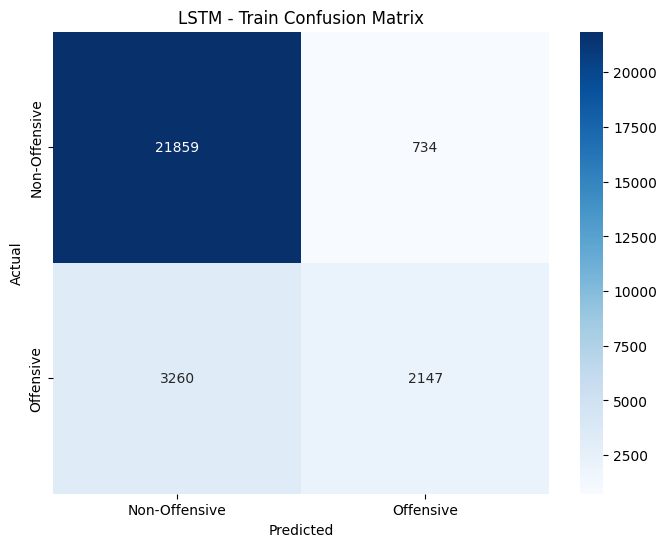


LSTM Modeli - Test Verisi Değerlendirme:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      2804
           1       0.68      0.37      0.48       711

    accuracy                           0.84      3515
   macro avg       0.77      0.66      0.69      3515
weighted avg       0.82      0.84      0.82      3515



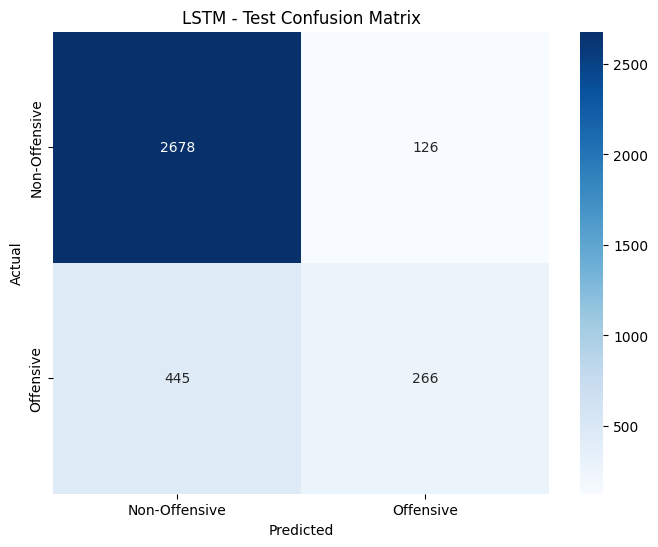

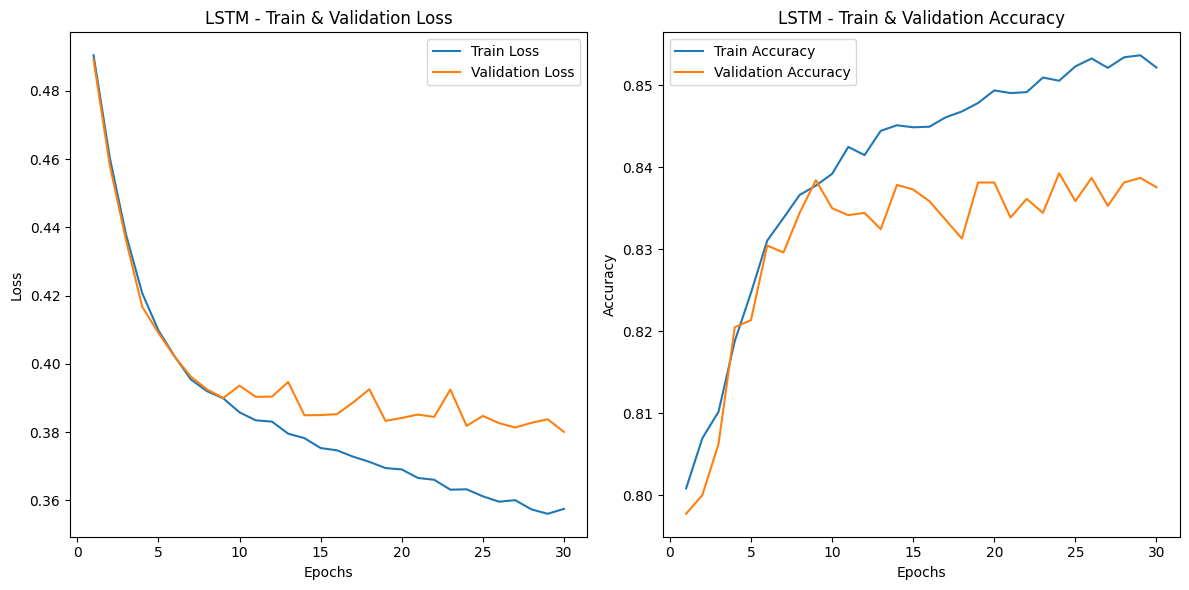


Bi-LSTM Modeli Eğitimde...
Epoch 1/30 - Train Loss: 0.4819 - Train Accuracy: 0.8041 - Val Loss: 0.4798 - Val Accuracy: 0.7977
Epoch 2/30 - Train Loss: 0.4498 - Train Accuracy: 0.8084 - Val Loss: 0.4434 - Val Accuracy: 0.8026
Epoch 3/30 - Train Loss: 0.4232 - Train Accuracy: 0.8170 - Val Loss: 0.4201 - Val Accuracy: 0.8100
Epoch 4/30 - Train Loss: 0.4075 - Train Accuracy: 0.8272 - Val Loss: 0.4057 - Val Accuracy: 0.8307
Epoch 5/30 - Train Loss: 0.4001 - Train Accuracy: 0.8315 - Val Loss: 0.3970 - Val Accuracy: 0.8302
Epoch 6/30 - Train Loss: 0.3944 - Train Accuracy: 0.8350 - Val Loss: 0.4029 - Val Accuracy: 0.8248
Epoch 7/30 - Train Loss: 0.3889 - Train Accuracy: 0.8377 - Val Loss: 0.3928 - Val Accuracy: 0.8347
Epoch 8/30 - Train Loss: 0.3848 - Train Accuracy: 0.8400 - Val Loss: 0.3895 - Val Accuracy: 0.8353
Epoch 9/30 - Train Loss: 0.3832 - Train Accuracy: 0.8414 - Val Loss: 0.3906 - Val Accuracy: 0.8341
Epoch 10/30 - Train Loss: 0.3790 - Train Accuracy: 0.8424 - Val Loss: 0.3896 - Va

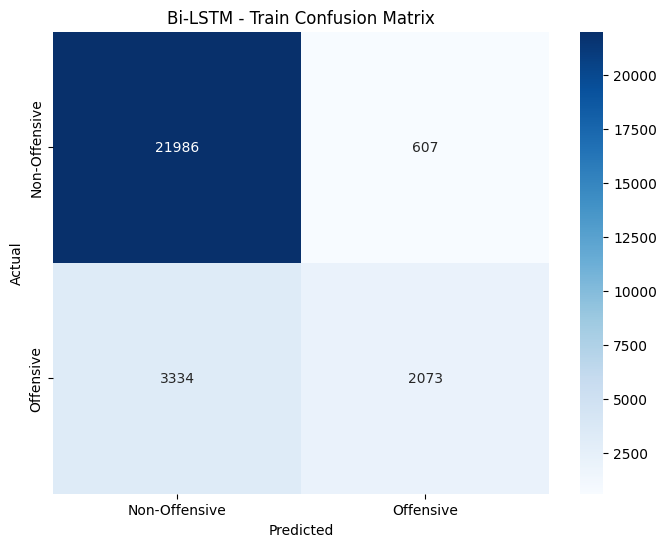


Bi-LSTM Modeli - Test Verisi Değerlendirme:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2804
           1       0.69      0.36      0.47       711

    accuracy                           0.84      3515
   macro avg       0.77      0.66      0.69      3515
weighted avg       0.82      0.84      0.82      3515



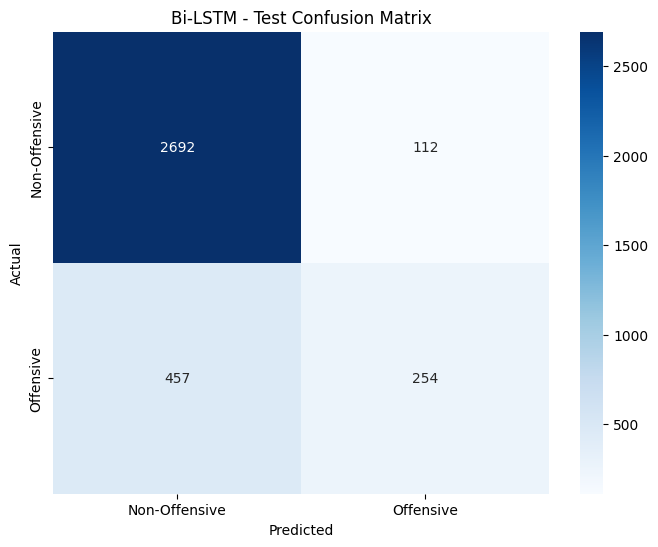

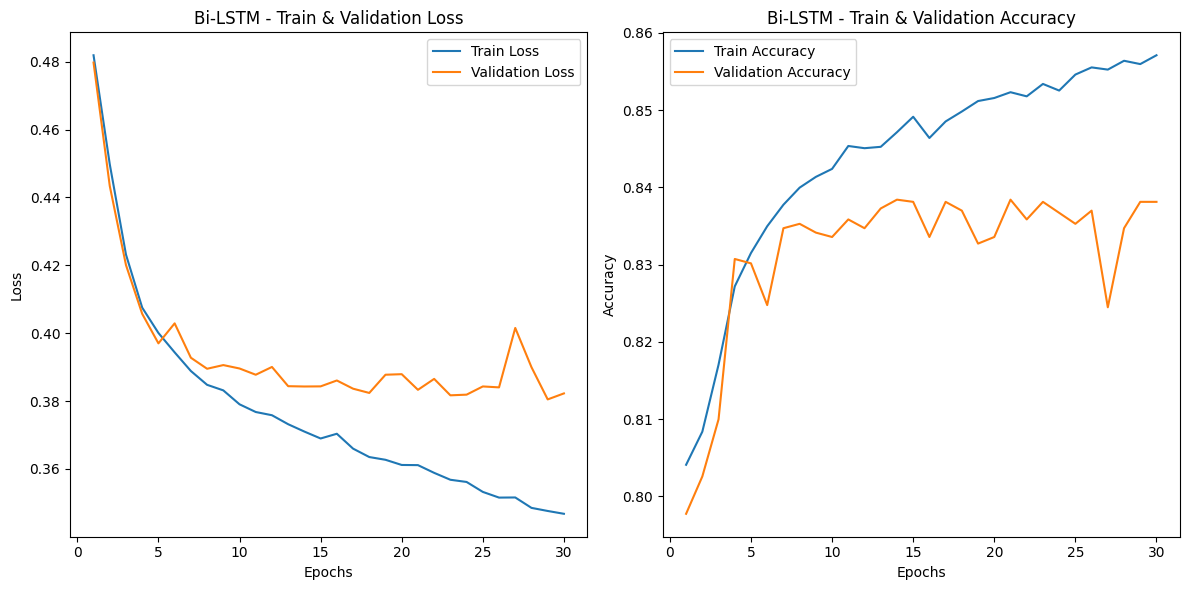


GRU Modeli Eğitimde...
Epoch 1/30 - Train Loss: 0.4856 - Train Accuracy: 0.8005 - Val Loss: 0.4869 - Val Accuracy: 0.7977
Epoch 2/30 - Train Loss: 0.4567 - Train Accuracy: 0.8071 - Val Loss: 0.4561 - Val Accuracy: 0.8000
Epoch 3/30 - Train Loss: 0.4351 - Train Accuracy: 0.8107 - Val Loss: 0.4337 - Val Accuracy: 0.8074
Epoch 4/30 - Train Loss: 0.4205 - Train Accuracy: 0.8192 - Val Loss: 0.4277 - Val Accuracy: 0.8134
Epoch 5/30 - Train Loss: 0.4091 - Train Accuracy: 0.8254 - Val Loss: 0.4090 - Val Accuracy: 0.8174
Epoch 6/30 - Train Loss: 0.4019 - Train Accuracy: 0.8296 - Val Loss: 0.4042 - Val Accuracy: 0.8279
Epoch 7/30 - Train Loss: 0.3972 - Train Accuracy: 0.8333 - Val Loss: 0.4014 - Val Accuracy: 0.8287
Epoch 8/30 - Train Loss: 0.3939 - Train Accuracy: 0.8344 - Val Loss: 0.3992 - Val Accuracy: 0.8293
Epoch 9/30 - Train Loss: 0.3907 - Train Accuracy: 0.8361 - Val Loss: 0.3929 - Val Accuracy: 0.8344
Epoch 10/30 - Train Loss: 0.3868 - Train Accuracy: 0.8393 - Val Loss: 0.3944 - Val Ac

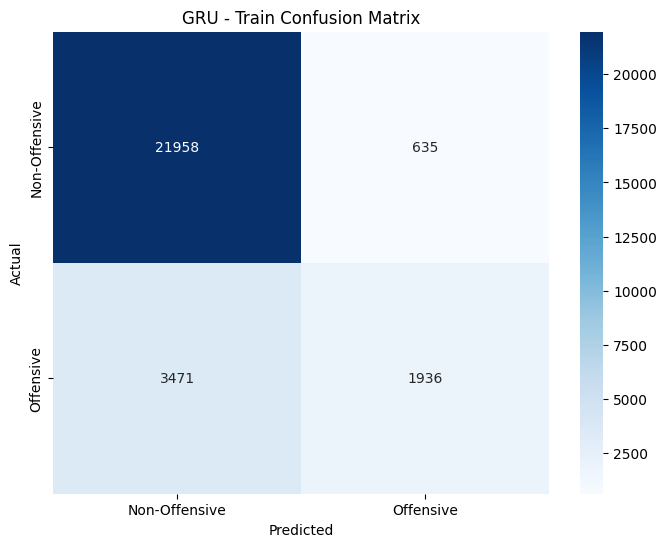


GRU Modeli - Test Verisi Değerlendirme:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2804
           1       0.69      0.34      0.46       711

    accuracy                           0.84      3515
   macro avg       0.77      0.65      0.68      3515
weighted avg       0.82      0.84      0.81      3515



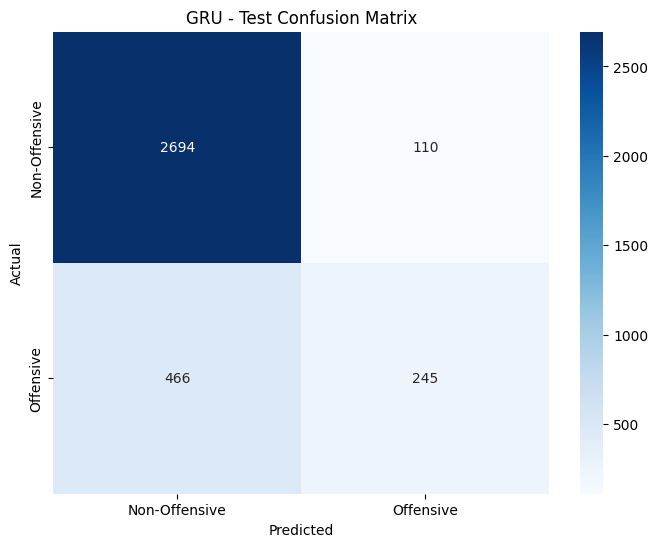

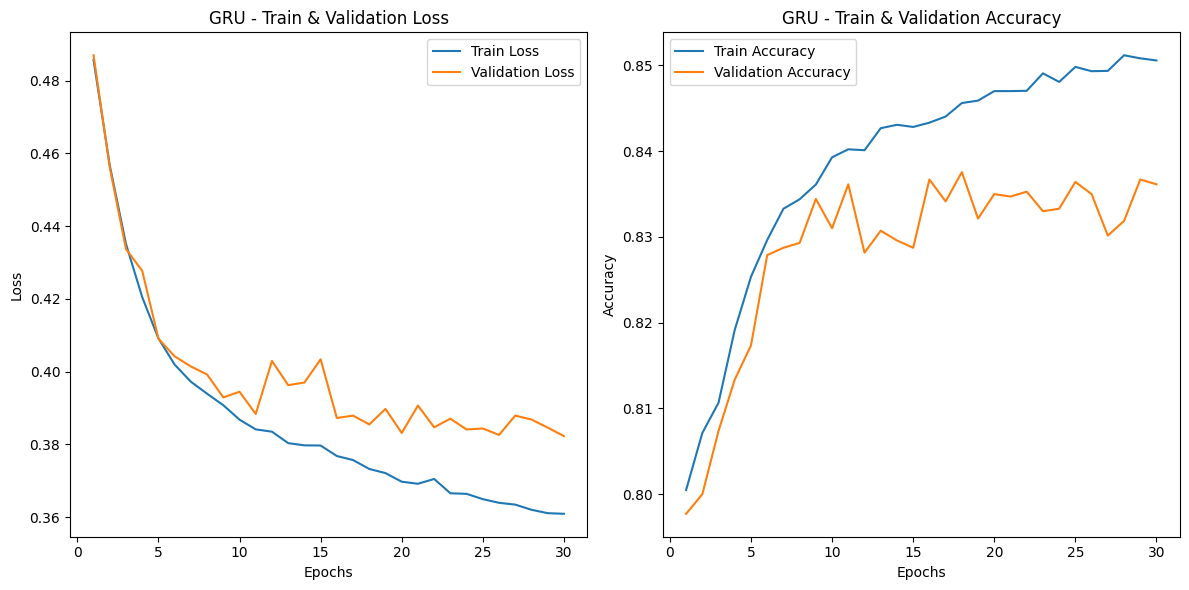


CNN Modeli Eğitimde...
Epoch 1/30 - Train Loss: 0.4758 - Train Accuracy: 0.8035 - Val Loss: 0.4711 - Val Accuracy: 0.8043
Epoch 2/30 - Train Loss: 0.4397 - Train Accuracy: 0.8131 - Val Loss: 0.4316 - Val Accuracy: 0.8142
Epoch 3/30 - Train Loss: 0.4156 - Train Accuracy: 0.8226 - Val Loss: 0.4276 - Val Accuracy: 0.8287
Epoch 4/30 - Train Loss: 0.4063 - Train Accuracy: 0.8279 - Val Loss: 0.4011 - Val Accuracy: 0.8239
Epoch 5/30 - Train Loss: 0.3988 - Train Accuracy: 0.8318 - Val Loss: 0.3991 - Val Accuracy: 0.8213
Epoch 6/30 - Train Loss: 0.3956 - Train Accuracy: 0.8346 - Val Loss: 0.4592 - Val Accuracy: 0.8114
Epoch 7/30 - Train Loss: 0.3887 - Train Accuracy: 0.8361 - Val Loss: 0.3955 - Val Accuracy: 0.8267
Epoch 8/30 - Train Loss: 0.3842 - Train Accuracy: 0.8379 - Val Loss: 0.4052 - Val Accuracy: 0.8253
Epoch 9/30 - Train Loss: 0.3826 - Train Accuracy: 0.8412 - Val Loss: 0.4096 - Val Accuracy: 0.8228
Epoch 10/30 - Train Loss: 0.3806 - Train Accuracy: 0.8410 - Val Loss: 0.3929 - Val Ac

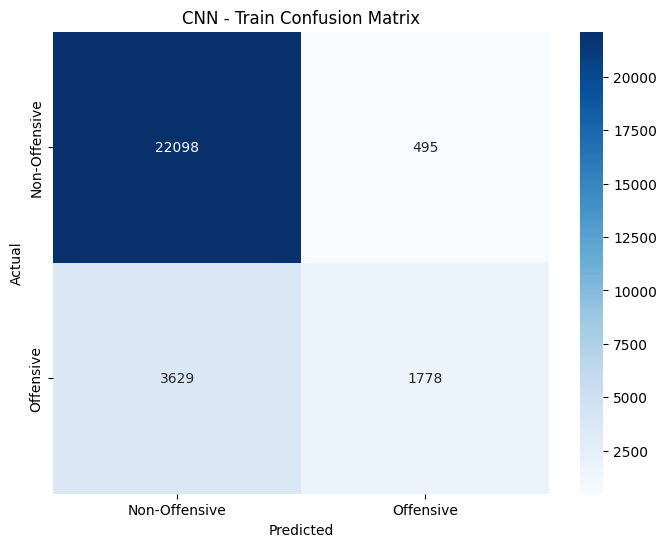


CNN Modeli - Test Verisi Değerlendirme:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2804
           1       0.70      0.30      0.41       711

    accuracy                           0.83      3515
   macro avg       0.77      0.63      0.66      3515
weighted avg       0.81      0.83      0.80      3515



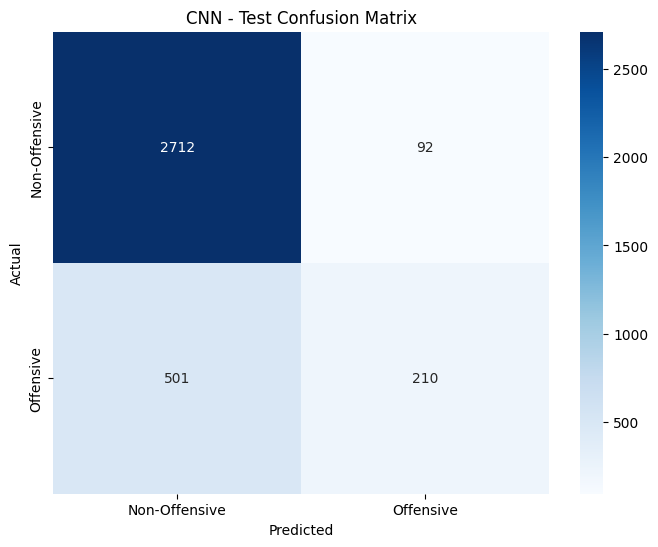

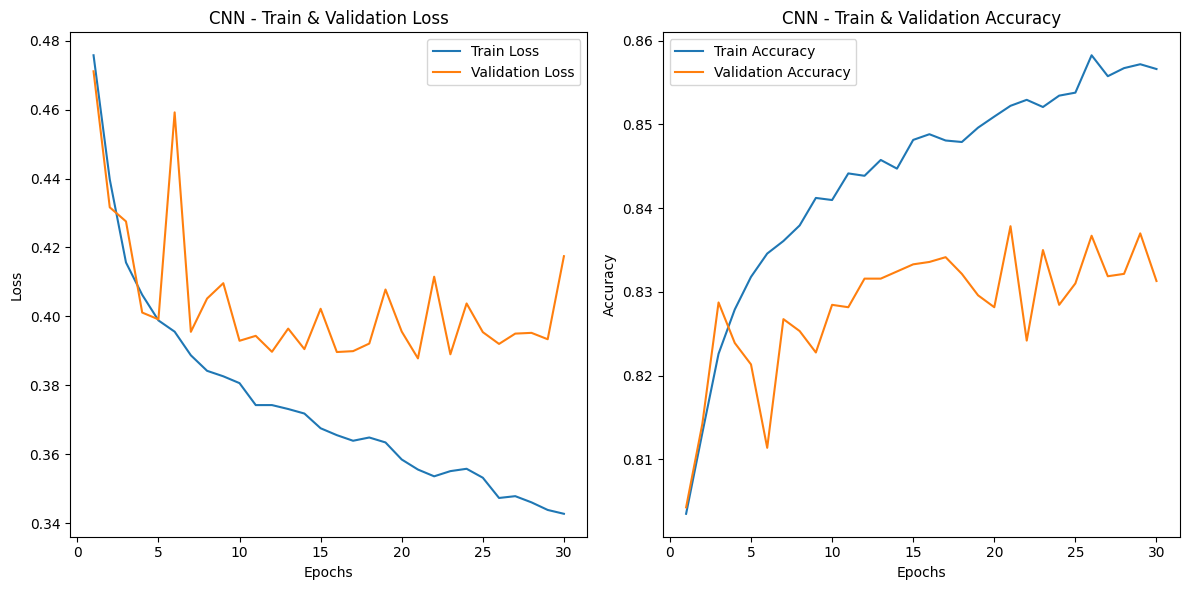

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.nn.functional import softmax

# Google Drive'ı bağlama
from google.colab import drive
drive.mount('/content/drive')

# GPU kullanımı kontrolü
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

# Dosya yolları
train_data_path = "/content/drive/My Drive/zemberturk_embeddings.csv"
test_data_path = "/content/drive/My Drive/zemberturk_embeddings_test.csv"

# Eğitim ve Test Verilerini Yükleme
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

print("Eğitim veri seti başarıyla yüklendi!")
print("Test veri seti başarıyla yüklendi!")
print(train_df.head())
print(test_df.head())

# Embedding ve Etiketlerin Hazırlanması
train_embedding_df = train_df[[col for col in train_df.columns if col.startswith("embedding_")]]
test_embedding_df = test_df[[col for col in test_df.columns if col.startswith("embedding_")]]

X_train = train_embedding_df.values
y_train = train_df['Offensive_Label'].values

X_test = test_embedding_df.values
y_test = test_df['Offensive_Label'].values

# PyTorch Dataset Sınıfı
class EmbeddingDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return torch.tensor(self.embeddings[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.long)

train_dataset = EmbeddingDataset(X_train, y_train)
test_dataset = EmbeddingDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128)

# Model Sınıfları
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # Batch boyutuna uygun hale getirme
        _, (hidden, _) = self.lstm(x)
        return self.fc(hidden[-1])

class BiLSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(BiLSTMClassifier, self).__init__()
        self.bilstm = nn.LSTM(input_size, hidden_size, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        _, (hidden, _) = self.bilstm(x)
        hidden = torch.cat((hidden[-2], hidden[-1]), dim=1)
        return self.fc(hidden)

class GRUClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(GRUClassifier, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        _, hidden = self.gru(x)
        return self.fc(hidden[-1])

class CNNClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.fc = nn.Linear((input_size // 2) * 128, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten
        return self.fc(x)

# Eğitim Fonksiyonu
def train_model(model, train_loader, criterion, optimizer, epochs):
    model.to(device)  # Modeli GPU'ya taşı
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        correct_train_preds = 0
        total_train_preds = 0
        for embeddings, labels in train_loader:
            embeddings, labels = embeddings.to(device), labels.to(device)  # Veriyi GPU'ya taşı
            optimizer.zero_grad()
            outputs = model(embeddings)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_train_preds += torch.sum(preds == labels).item()
            total_train_preds += labels.size(0)

        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(correct_train_preds / total_train_preds)

        # Validation loss and accuracy
        model.eval()
        val_loss = 0
        correct_val_preds = 0
        total_val_preds = 0
        with torch.no_grad():
            for embeddings, labels in test_loader:
                embeddings, labels = embeddings.to(device), labels.to(device)
                outputs = model(embeddings)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct_val_preds += torch.sum(preds == labels).item()
                total_val_preds += labels.size(0)

        val_losses.append(val_loss / len(test_loader))
        val_accuracies.append(correct_val_preds / total_val_preds)

        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_losses[-1]:.4f} - Train Accuracy: {train_accuracies[-1]:.4f} - Val Loss: {val_losses[-1]:.4f} - Val Accuracy: {val_accuracies[-1]:.4f}")

    return train_losses, val_losses, train_accuracies, val_accuracies

# Eğitim ve doğrulama kayıpları ve doğrulukları grafiği çizme
def plot_training_results(train_losses, val_losses, train_accuracies, val_accuracies, model_name):
    epochs = range(1, len(train_losses) + 1)

    # Kayıp grafiği
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} - Train & Validation Loss')
    plt.legend()

    # Doğruluk grafiği
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label="Train Accuracy")
    plt.plot(epochs, val_accuracies, label="Validation Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} - Train & Validation Accuracy')
    plt.legend()

    # Grafiklerin gösterilmesi
    plt.tight_layout()
    plt.show()

# Evaluate on train data
def evaluate_on_train(model, train_loader):
    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for embeddings, labels in train_loader:
            embeddings, labels = embeddings.to(device), labels.to(device)
            outputs = model(embeddings)
            _, preds = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    return all_labels, all_preds

# Evaluate on test data
def evaluate_on_test(model, test_loader):
    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for embeddings, labels in test_loader:
            embeddings, labels = embeddings.to(device), labels.to(device)
            outputs = model(embeddings)
            _, preds = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    return all_labels, all_preds

# Print classification metrics (classification report and confusion matrix)
def print_classification_metrics(true_labels, preds, model_name, data_type="Train"):
    print(f"\n{model_name} Modeli - {data_type} Verisi Değerlendirme:")
    # Classification report
    print(classification_report(true_labels, preds))

    # Confusion matrix
    cm = confusion_matrix(true_labels, preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Offensive', 'Offensive'], yticklabels=['Non-Offensive', 'Offensive'])
    plt.title(f"{model_name} - {data_type} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Model Parametreleri
input_size = train_embedding_df.shape[1]  # Embedding boyutu
hidden_size = 128
num_classes = len(train_df['Offensive_Label'].unique())
learning_rate = 0.0001
epochs = 30

# Modellerin Eğitimi ve Değerlendirilmesi
for ModelClass, model_name in zip([LSTMClassifier, BiLSTMClassifier, GRUClassifier, CNNClassifier], ["LSTM", "Bi-LSTM", "GRU", "CNN"]):
    print(f"\n{model_name} Modeli Eğitimde...")
    model = ModelClass(input_size, hidden_size, num_classes) if model_name != "CNN" else ModelClass(input_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Eğitim Süreci
    train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, criterion, optimizer, epochs)

    # Eğitim Verisi Üzerinde Tahminler ve Confusion Matrix
    train_labels, train_preds = evaluate_on_train(model, train_loader)
    print_classification_metrics(train_labels, train_preds, model_name, data_type="Train")

    # Test Verisi Üzerinde Tahminler ve Confusion Matrix
    test_labels, test_preds = evaluate_on_test(model, test_loader)
    print_classification_metrics(test_labels, test_preds, model_name, data_type="Test")

    # Doğruluk ve Kayıp Grafiklerini Çizme
    plot_training_results(train_losses, val_losses, train_accuracies, val_accuracies, model_name)

